In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import os

In [22]:
#organizamos las imagenes a un solo tamaño
def organizar_tamano(image_dir,img_width,img_height):
  target_size = (img_width, img_height)  # Puedes ajustar el tamaño según tus necesidades

  for filename in os.listdir(image_dir):
      filepath = os.path.join(image_dir, filename)
      if os.path.isfile(filepath):
          try:
              image = Image.open(filepath)
              resized_image = image.resize(target_size)
              resized_image.save(filepath)            
          except Exception as e:
              print(f"Error al procesar la imagen {filename}: {str(e)}")

In [24]:
# Tamaño de las imágenes
img_width, img_height = 224, 224

image_dir = "/content/drive/MyDrive/PROYECTO/test/Borracho"
organizar_tamano(image_dir,img_width,img_height)
image_dir = "/content/drive/MyDrive/PROYECTO/test/Normal"
organizar_tamano(image_dir,img_width,img_height)
image_dir = "/content/drive/MyDrive/PROYECTO/train/Borracho"
organizar_tamano(image_dir,img_width,img_height)
image_dir = "/content/drive/MyDrive/PROYECTO/train/Normal"
organizar_tamano(image_dir,img_width,img_height)

In [25]:
def validate_image_size(directory, target_size):
    for root, dirs, files in os.walk(directory):
        for file in files:
            image_path = os.path.join(root, file)
            with Image.open(image_path) as img:
                if img.size != target_size:
                    print(f"Image {image_path} has incorrect size: {img.size}")

validate_image_size(image_dir, (img_width, img_height))

In [31]:
# Directorios de entrenamiento y prueba
train_data_dir = '/content/drive/MyDrive/PROYECTO/train'
test_data_dir = '/content/drive/MyDrive/PROYECTO/test'



In [32]:

# Preprocesamiento y aumento de datos en el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Preprocesamiento en el conjunto de prueba (solo reescalamiento)
test_datagen = ImageDataGenerator(rescale=1./255)

# Carga de datos de entrenamiento y prueba
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)



Found 170 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [33]:

# Construcción del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
# Parámetros de entrenamiento
batch_size = 32
epochs = 20

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    verbose=0
)


<ipython-input-45-95fc39d51a78>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


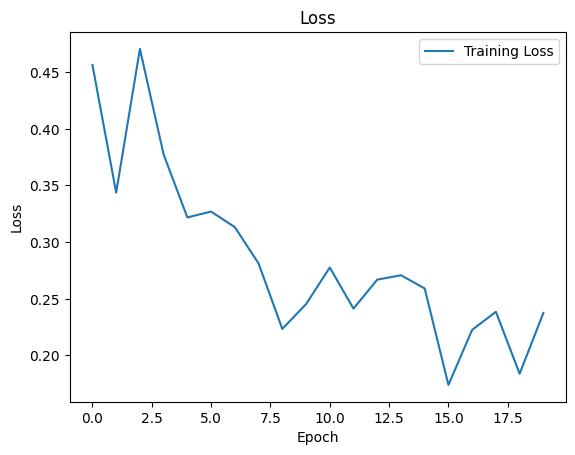

In [46]:

# Obtener las métricas de entrenamiento y validación
train_loss = history.history['loss']
#val_loss = history.history['val_loss']


# Graficar la pérdida
plt.plot(train_loss, label='Training Loss')
#plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


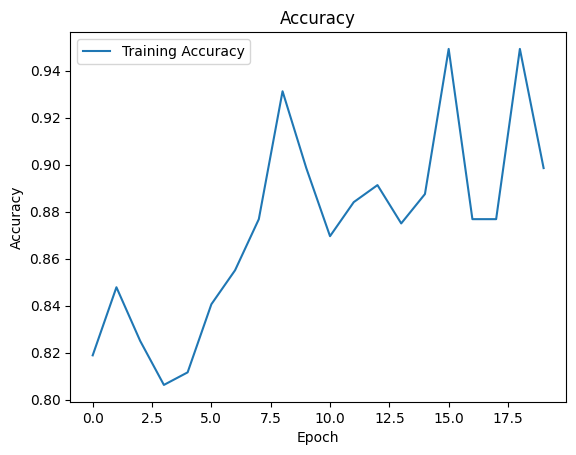

In [48]:

train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
# Graficar la precisión
plt.plot(train_accuracy, label='Training Accuracy')
#plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
model.save('/content/drive/MyDrive/PROYECTO/modelo.h5')

In [53]:
import tensorflow as tf
import keras
import PIL

print("Versión de TensorFlow:", tf.__version__)
print("Versión de keras:", keras.__version__)
print("Versión de PIL:", PIL.__version__)


Versión de TensorFlow: 2.12.0
Versión de keras: 2.12.0
Versión de PIL: 8.4.0


In [55]:
import sys
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
